# Taylor Swift Swears Now?
### A Journey into Taylor Swift's Vulgarity

## Creating DataFrames for Each Album's Data

In [1]:
#import needed packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#debut
debut_filepath = '01-taylor_swift.csv'
debut_1 = pd.read_csv(debut_filepath)
#fearless
fearless_filepath = '02-fearless_taylors_version.csv'
fearless_2 = pd.read_csv(fearless_filepath)
#speak now
speak_now_filepath = '03-speak_now_deluxe_package.csv'
speak_now_3 = pd.read_csv(speak_now_filepath)
#red 
red_filepath = '04-red_deluxe_edition.csv'
red_4 = pd.read_csv(red_filepath)
#1989
_1989_filepath = '05-1989_deluxe.csv'
_1989_5 = pd.read_csv(_1989_filepath)
#reputation
reputation_filepath = '06-reputation.csv'
reputation_6 = pd.read_csv(reputation_filepath)
#lover
lover_filepath = '07-lover.csv'
lover_7 = pd.read_csv(lover_filepath)
#folklore
folklore_filepath = '08-folklore_deluxe_version.csv'
folklore_8 = pd.read_csv(folklore_filepath)
#evermore
evermore_filepath = '09-evermore_deluxe_version.csv'
evermore_9 = pd.read_csv(evermore_filepath)
evermore_9.head()

,album_name,track_title,track_n,lyric,line
0,evermore (deluxe version),willow,1,I'm like the water when your ship rolled in th...,1
1,evermore (deluxe version),willow,1,"Rough on the surface, but you cut through like...",2
2,evermore (deluxe version),willow,1,And if it was an open-shut case,3
3,evermore (deluxe version),willow,1,I never would've known from that look on your ...,4
4,evermore (deluxe version),willow,1,Lost in your current like a priceless wine,5


## Merging All the Ablum DataFrames into a Discography  DataFrame

In [2]:
ts_data = pd.concat([debut_1, fearless_2, speak_now_3, 
                            red_4, _1989_5, reputation_6,
                            lover_7, folklore_8, evermore_9])
ts_data

,album_name,track_title,track_n,lyric,line
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5
...,...,...,...,...,...
907,evermore (deluxe version),​it’s time to go,17,"You know, you know, you know, you know",50
908,evermore (deluxe version),​it’s time to go,17,When it's time to go,51
909,evermore (deluxe version),​it’s time to go,17,So then you go,52
910,evermore (deluxe version),​it’s time to go,17,Then you go,53


## Data Cleaning

#### A Fun Fact Before We Begin Data Cleaning!

In [3]:
ts_data['track_title'].nunique()

163

Taylor Swift has as of Fearless (Taylor's Version) 163 songs!

#### Check for any reoccuring errors in data

In [4]:
ts_data['lyric'].value_counts()

Joeboy 'Sip (Alcohol)' Official Lyrics & Meaning | Verified    26
Today was a fairytale                                          16
Look what you just made me do                                  13
What died didn't stay dead                                     12
(Eh, eh, eh, eh, eh)                                           12
                                                               ..
And nothin' we say is gonna save us from the fallout            1
I once was poison ivy, but now I'm your daisy                   1
But this is gettin' good now                                    1
This is looking like a contest                                  1
This is the last time I say it's been you all along             1
Name: lyric, Length: 5606, dtype: int64

#### Remove all occurences of "Joeboy 'Sip (Alcohol)' Official Lyrics & Meaning | Verified"

In [5]:
# Drop Line from Data Science Parichay
ts_data.drop(ts_data.index
             [ts_data['lyric'] == 
             "Joeboy 'Sip (Alcohol)' Official Lyrics & Meaning | Verified"],
             inplace=True)
# reset index
ts_data.reset_index(inplace=True)
del ts_data['index']
#check for occurences
ts_data.loc[ts_data.lyric == "Joeboy 'Sip (Alcohol)' Official Lyrics & Meaning | Verified"]


,album_name,track_title,track_n,lyric,line


#### Switch Row from By Lyric to By Word

In [6]:
#turn each lyric entry from string to list of strings
ts_data = ts_data.assign(lyric =[lyric.split() for lyric in ts_data.lyric]) 
ts_data

,album_name,track_title,track_n,lyric,line
0,Taylor Swift,Tim McGraw,1,"[He, said, the, way, my, blue, eyes, shined]",1
1,Taylor Swift,Tim McGraw,1,"[Put, those, Georgia, stars, to, shame, that, ...",2
2,Taylor Swift,Tim McGraw,1,"[I, said,, ""That's, a, lie""]",3
3,Taylor Swift,Tim McGraw,1,"[Just, a, boy, in, a, Chevy, truck]",4
4,Taylor Swift,Tim McGraw,1,"[That, had, a, tendency, of, gettin', stuck]",5
...,...,...,...,...,...
8131,evermore (deluxe version),​it’s time to go,17,"[You, know,, you, know,, you, know,, you, know]",50
8132,evermore (deluxe version),​it’s time to go,17,"[When, it's, time, to, go]",51
8133,evermore (deluxe version),​it’s time to go,17,"[So, then, you, go]",52
8134,evermore (deluxe version),​it’s time to go,17,"[Then, you, go]",53


In [7]:
flattened_col = pd.DataFrame([(index, word) for (index, words) in ts_data['lyric'].iteritems() for word in words],
                              columns=['index','word']).set_index('index') #Mr.Gorton
ts_words = ts_data.drop('lyric', axis='columns').join(flattened_col)
ts_words.reset_index(inplace = True, drop = True)
ts_words.index.name='index'
ts_words

,album_name,track_title,track_n,line,word
index,,,,,
0,Taylor Swift,Tim McGraw,1,1,He
1,Taylor Swift,Tim McGraw,1,1,said
2,Taylor Swift,Tim McGraw,1,1,the
3,Taylor Swift,Tim McGraw,1,1,way
4,Taylor Swift,Tim McGraw,1,1,my
...,...,...,...,...,...
58069,evermore (deluxe version),​it’s time to go,17,53,you
58070,evermore (deluxe version),​it’s time to go,17,53,go
58071,evermore (deluxe version),​it’s time to go,17,54,You


#### Get Rid of Special Characters Except ' and -

In [8]:
ts_words.loc[ts_words.word == "doin'"] # check for '

,album_name,track_title,track_n,line,word
index,,,,,
6678,Fearless (Taylor’s Version),Tell Me Why (Taylor’s Version),8,13,doin'
6781,Fearless (Taylor’s Version),Tell Me Why (Taylor’s Version),8,27,doin'
6872,Fearless (Taylor’s Version),Tell Me Why (Taylor’s Version),8,41,doin'
35191,reputation,Don’t Blame Me,4,2,doin'
35284,reputation,Don’t Blame Me,4,16,doin'
35316,reputation,Don’t Blame Me,4,20,doin'
35417,reputation,Don’t Blame Me,4,33,doin'
35449,reputation,Don’t Blame Me,4,37,doin'
35548,reputation,Don’t Blame Me,4,52,doin'


In [9]:
ts_words.loc[ts_words.word == "yeah?)"] #check for Special Characters

,album_name,track_title,track_n,line,word
index,,,,,
16849,Speak Now (Deluxe),Better Than Revenge,10,56,yeah?)


In [10]:
ts_words['word'] = ts_words.word.str.replace(r"[();:,.?""]",'') # changing regular expresion, this warning is okay


<ipython-input-10-185ab78c0d8d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ts_words['word'] = ts_words.word.str.replace(r"[();:,.?""]",'') # changing regular expresion, this warning is okay


In [11]:
ts_words.loc[6678] # check for '

album_name        Fearless (Taylor’s Version)
track_title    Tell Me Why (Taylor’s Version)
track_n                                     8
line                                       13
word                                    doin'
Name: 6678, dtype: object

In [12]:
ts_words.loc[16849] #check for Special Characters

album_name      Speak Now (Deluxe)
track_title    Better Than Revenge
track_n                         10
line                            56
word                          yeah
Name: 16849, dtype: object

#### Switch to All Lowercase

In [13]:
ts_words['word'] = ts_words['word'].str.lower()

In [14]:
ts_words #check for all lowercase

,album_name,track_title,track_n,line,word
index,,,,,
0,Taylor Swift,Tim McGraw,1,1,he
1,Taylor Swift,Tim McGraw,1,1,said
2,Taylor Swift,Tim McGraw,1,1,the
3,Taylor Swift,Tim McGraw,1,1,way
4,Taylor Swift,Tim McGraw,1,1,my
...,...,...,...,...,...
58069,evermore (deluxe version),​it’s time to go,17,53,you
58070,evermore (deluxe version),​it’s time to go,17,53,go
58071,evermore (deluxe version),​it’s time to go,17,54,you


### Yay, We Finished the Data Cleaning!!!

## Data Visualization

###### Some Background for the Uncool People:
Taylor Swift is know for her Track 5s.  The Track 5 of every album is always the most emotional and vulnerable track of the ablum. Let's see if this is actually true by looking at the corralation between the number of swear words and track number! 

In [15]:
swears = ['darn', 'damn', 'ass','asshole','shit', 'bitches', 'bitch', 'fuck', 'fucking', 'fucked', 'hell']

#### Create Dataframe of Swears in Taylor Swift Songs

In [16]:

swr_data = ts_words['word'].isin(swears).to_frame()
swr_data.index.name='index'
swr_data = swr_data.rename(columns = {'word':'is_swear'})
swr_data = swr_data.loc[swr_data['is_swear'] == True]
swr_data

,is_swear
index,
1330,True
23558,True
30559,True
30659,True
31808,True
34791,True
35712,True
35987,True
41879,True


In [17]:
swr_data = ts_words.join(swr_data, how = 'right')
swr_data

,album_name,track_title,track_n,line,word,is_swear
index,,,,,,
1330,Taylor Swift,Cold As You,5,17,damn,True
23558,Red (Deluxe Edition),The Lucky One,13,27,hell,True
30559,1989 (Deluxe),Wildest Dreams,9,6,hell,True
30659,1989 (Deluxe),Wildest Dreams,9,23,hell,True
31808,1989 (Deluxe),I Know Places,12,20,damn,True
34791,reputation,I Did Something Bad,3,9,shit,True
35712,reputation,Delicate,5,11,damn,True
35987,reputation,Delicate,5,58,damn,True
41879,Lover,The Man,4,28,bitches,True


### Number of Swears Per Album, By Swear

In [18]:
ts_swr = swr_data.groupby('album_name')['word'].value_counts().to_frame()
ts_swr.columns = ts_swr.columns[:-1].tolist() + ['num'] 
ts_swr

num
album_name                word        
1989 (Deluxe)             hell       2
                          damn       1
Lover                     bitch      1
                          bitches    1
                          damn       1
                          hell       1
Red (Deluxe Edition)      hell       1
Taylor Swift              damn       1
evermore (deluxe version) damn       5
                          shit       4
                          fuck       1
                          fucked     1
folklore (deluxe version) shit       3
                          fuck       2
                          hell       2
                          bitch      1
                          damn       1
reputation                damn       2
                          shit       1

In [19]:
ts_swr = ts_swr.reset_index().pivot(columns='album_name',index='word',values='num')
ts_swr = ts_swr.fillna(0)
ts_swr = ts_swr.reindex(columns= ['Taylor Swift', 'Red (Deluxe Edition)', '1989 (Deluxe)',
                                  'reputation','Lover','folklore (deluxe version)','evermore (deluxe version)'])
ts_swr

album_name,Taylor Swift,Red (Deluxe Edition),1989 (Deluxe),reputation,Lover,folklore (deluxe version),evermore (deluxe version)
word,,,,,,,
bitch,0.0,0.0,0.0,0.0,1.0,1.0,0.0
bitches,0.0,0.0,0.0,0.0,1.0,0.0,0.0
damn,1.0,0.0,1.0,2.0,1.0,1.0,5.0
fuck,0.0,0.0,0.0,0.0,0.0,2.0,1.0
fucked,0.0,0.0,0.0,0.0,0.0,0.0,1.0
hell,0.0,1.0,2.0,0.0,1.0,2.0,0.0
shit,0.0,0.0,0.0,1.0,0.0,3.0,4.0


<AxesSubplot:title={'center':'Number of Swears Per Album, by Swear'}, xlabel='album_name', ylabel='word'>

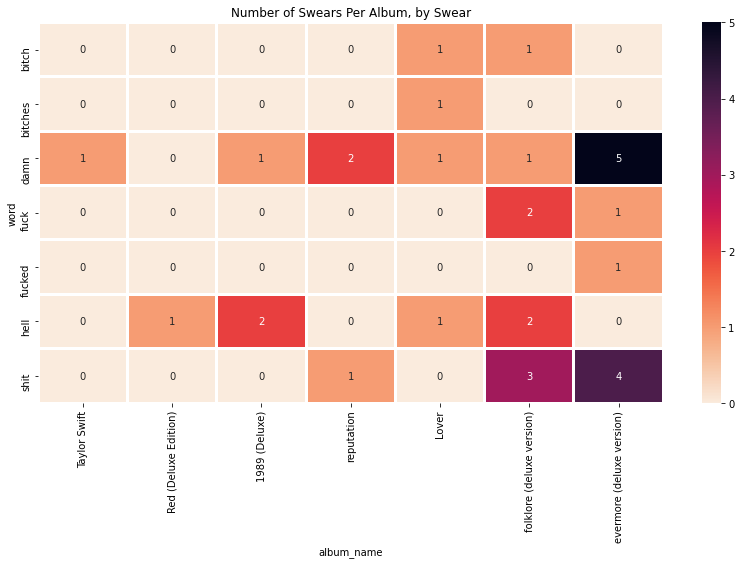

In [20]:
plt.figure(figsize=(14,7))
plt.title("Number of Swears Per Album, by Swear")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data= ts_swr,  linewidths=2, annot=True, cmap = 'rocket_r')

### Heatmap showing relationship between swear words and track number
#heatmap of Number of Swears words per track number, by album